In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from Config import *

W0413 10:08:54.221251 139834255828800 deprecation.py:506] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
import os


def folder_creat(name, directory):
    os.chdir(directory)
    fileli = os.listdir()
    if name in fileli:
        print(f'Folder "{name}" exist!')
    else:
        os.mkdir(name)
        print(f'Folder "{name}" succesfully created!')
        


folder_creat(outputdirname, './')

Folder "results" exist!


In [3]:
from PIL import Image,ImageOps
import numpy as np
import glob

def filetoarray(imagenum,inputfolder='./canny'):
    from keras.preprocessing.image import load_img
    from keras.preprocessing.image import img_to_array
    from keras.preprocessing.image import array_to_img
    img = load_img(inputfolder+'/sensorphoto-'+str(imagenum)+'-1.BMP.png',color_mode="grayscale",target_size=targetinputshape)
    img_array = img_to_array(img)
    return img_array

In [4]:
import os

traindir = os.listdir(inputfolderTrain)
if len(traindir) == 0:
    print("Empty Training directory")
else:
    print("Found Training images")
    trdf=pd.read_csv(ScratchFileTrain)
    trdf['ImageLoc'] = trdf.ImageLoc.astype(int)
    trdf['array'] = trdf.apply(lambda row: filetoarray(row.ImageLoc,inputfolderTrain), axis=1)
    trdf['Scratched'] = 0
    trdf.loc[trdf['Target'] ==11,'Scratched'] = 1
    trdf.loc[trdf['Target'] ==1,'Scratched'] = 1
    print('Scratched Images in Training dataset = '+str(len(trdf.query('Scratched==1'))))
    print('Clean Images in Training dataset = '+str(len(trdf.query('Scratched==0'))))
    X_train=np.array(list(trdf["array"]))
    Y_train=trdf["Scratched"]
    Y_train = to_categorical(Y_train)
    print("Train shape: "+str(X_train.shape))
    
testdir = os.listdir(inputfolderTest)
if len(testdir) == 0:
    print("Empty Testing directory")
else:
    print("Found Testing images")
    tedf=pd.read_csv(ScratchFileTest)
    tedf['ImageLoc'] = tedf.ImageLoc.astype(int)
    tedf['array'] = tedf.apply(lambda row: filetoarray(row.ImageLoc,inputfolderTest), axis=1)
    tedf['Scratched'] = 0
    tedf.loc[tedf['Target'] ==11,'Scratched'] = 1
    tedf.loc[tedf['Target'] ==1,'Scratched'] = 1
    print('Scratched Images in Testing dataset = '+str(len(tedf.query('Scratched==1'))))
    print('Clean Images in Testing dataset = '+str(len(tedf.query('Scratched==0'))))
    X_test=np.array(list(tedf["array"]))
    Y_test=tedf["Scratched"]
    Y_test = to_categorical(Y_test)
    print("Test shape: "+str(X_test.shape))


evaldir = os.listdir(inputfolderEvaluate)
if len(evaldir) == 0:
    print("Empty Eval directory, will not evaluate")
else:
    print("Found Eval images")
    evdf=pd.read_csv(ScratchFileEvaluate)
    evdf['ImageLoc'] = evdf.ImageLoc.astype(int)
    evdf['array'] = evdf.apply(lambda row: filetoarray(row.ImageLoc,inputfolderEvaluate), axis=1)
    evdf['Scratched'] = 0
    evdf.loc[evdf['Target'] ==11,'Scratched'] = 1
    evdf.loc[evdf['Target'] ==1,'Scratched'] = 1
    print('Scratched Images in Evaluate dataset = '+str(len(evdf.query('Scratched==1'))))
    print('Clean Images in Evaluate dataset = '+str(len(evdf.query('Scratched==0'))))
    X_eval=np.array(list(evdf["array"]))
    Y_eval=evdf["Scratched"]
    Y_eval = to_categorical(Y_eval)
    print("Eval shape: "+str(X_eval.shape))

Found Training images


Using TensorFlow backend.


Scratched Images in Training dataset = 78
Clean Images in Training dataset = 51
Train shape: (129, 100, 100, 1)
Found Testing images
Scratched Images in Testing dataset = 94
Clean Images in Testing dataset = 35
Test shape: (129, 100, 100, 1)
Empty Eval directory, will not evaluate


In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(lr=learningrate),
              metrics=['accuracy'])

trainhistory=model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
129/129 [==============================] - 1s 8ms/sample - loss: 15.1997 - acc: 0.5659
Epoch 2/50
129/129 [==============================] - 1s 8ms/sample - loss: 2.6946 - acc: 0.6512
Epoch 3/50
129/129 [==============================] - 1s 7ms/sample - loss: 0.6836 - acc: 0.6047
Epoch 4/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6809 - acc: 0.6047
Epoch 5/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6804 - acc: 0.6047
Epoch 6/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6799 - acc: 0.6047
Epoch 7/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6795 - acc: 0.6047
Epoch 8/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6790 - acc: 0.6047
Epoch 9/50
129/129 [==============================] - 1s 7ms/sample - loss: 0.6782 - acc: 0.6047
Epoch 10/50
129/129 [==============================] - 1s 8ms/sample - loss: 0.6773 - acc: 0.6047
Epoch 11/50
129/129 [=======

In [6]:
if len(traindir) != 0:
    score = model.evaluate(X_train, Y_train, verbose=0)
    Y_train_pred = model.predict_classes(X_train)
    print('Train loss:', score[0])
    print('Train accuracy:', score[1])

Train loss: 0.6741139398988827
Train accuracy: 0.60465115


In [7]:
if len(testdir) != 0:
    score = model.evaluate(X_test, Y_test, verbose=0)
    Y_test_pred = model.predict_classes(X_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Test loss: 0.6410745807396349
Test accuracy: 0.72868216


In [8]:
if len(evaldir) != 0:
    score = model.evaluate(X_eval, Y_eval, verbose=0)
    Y_eval_pred = model.predict_classes(X_eval)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

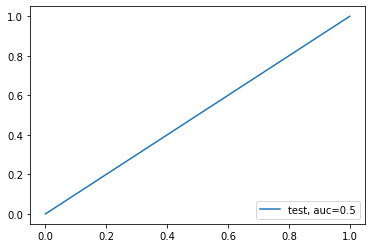

In [10]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.argmax(Y_test,axis=-1),  Y_test_pred)
auc = metrics.roc_auc_score(np.argmax(Y_test,axis=-1),  Y_test_pred)
plt.plot(fpr,tpr,label="test, auc="+str(auc))
plt.legend(loc=4)
plt.savefig(outputdirname+"/Test-ROC.png")

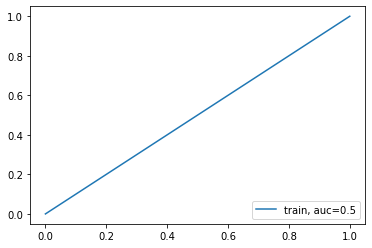

In [11]:
fpr, tpr, _ = metrics.roc_curve(np.argmax(Y_train,axis=-1),  Y_train_pred)
auc = metrics.roc_auc_score(np.argmax(Y_train,axis=-1),  Y_train_pred)
plt.plot(fpr,tpr,label="train, auc="+str(auc))
plt.legend(loc=4)
plt.savefig(outputdirname+"/Train-ROC.png")

In [12]:
if len(evaldir) != 0:
    print("True Eval")
    print(np.argmax(Y_train, axis=-1))
    print("Predicted Eval")
    print(Y_train_pred)
else:
    print("No eval images, so won't evaluate")

No eval images, so won't evaluate


In [13]:
print("Find plots in directory: "+outputdirname)

Find plots in directory: results
